# Data Set Information:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

# Data Source:

https://archive.ics.uci.edu/ml/datasets/wine

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Program to load Wine Dataset
# Load useful libraries
import pandas as pd
from sklearn.datasets import load_wine
# Loading dataset
data = load_wine()
# Configuring pandas to show all features
pd.set_option("display.max_rows", None, "display.max_columns", None)
# Converting data to a dataframe to view properly
data = pd.DataFrame(data=data['data'],columns=data['feature_names'])
# Printing first 5 observations
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [25]:
# checkiing shape of dataset
data.shape

(178, 13)

In [26]:
# There are 13 columns and 178 rows

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

All variables are continuous here

In [28]:
# Checking missing values
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [29]:
# No null values found

In [30]:
# skewness:
data.skew().sort_values(ascending=False)

magnesium                       1.098191
malic_acid                      1.039651
color_intensity                 0.868585
proline                         0.767822
proanthocyanins                 0.517137
nonflavanoid_phenols            0.450151
alcalinity_of_ash               0.213047
total_phenols                   0.086639
flavanoids                      0.025344
hue                             0.021091
alcohol                        -0.051482
ash                            -0.176699
od280/od315_of_diluted_wines   -0.307285
dtype: float64

In [31]:
# Skewness is less

<AxesSubplot:>

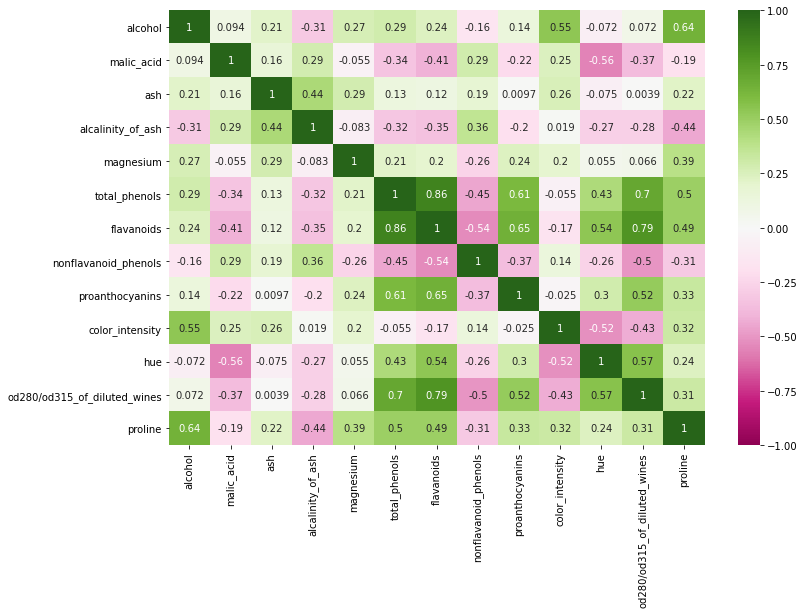

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap ='PiYG', vmin = -1, vmax = 1)

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

data_sc = pd.DataFrame(ss.fit_transform(data), columns = data.columns)
data_sc.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# Kmeans and Agglomerative Clustering without PCA on scaled data:


## KMeans

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [36]:
num=range(1,11)
err=[]
for i in num:
    model=KMeans(i)
    model.fit(data_sc)
    err.append(model.inertia_)

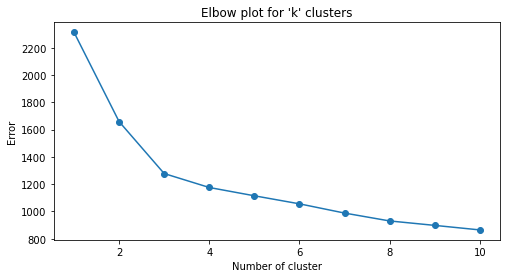

In [37]:
plt.figure(figsize=(8,4))
plt.plot(num, err, marker='o');
plt.xlabel('Number of cluster');
plt.ylabel('Error');
plt.title("Elbow plot for 'k' clusters");

In [38]:
from yellowbrick.cluster import SilhouetteVisualizer

silhouette score for 2 cluster is: 0.2683


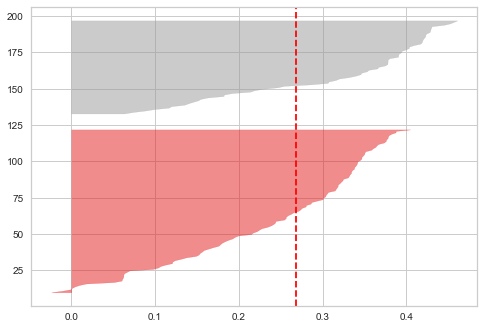

silhouette score for 3 cluster is: 0.2849


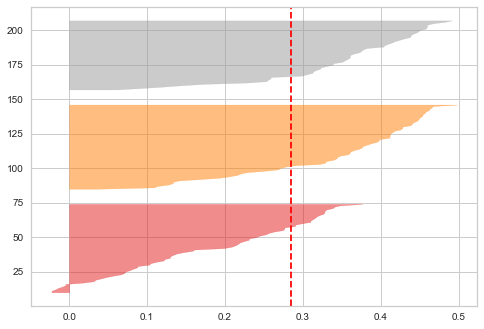

silhouette score for 4 cluster is: 0.2602


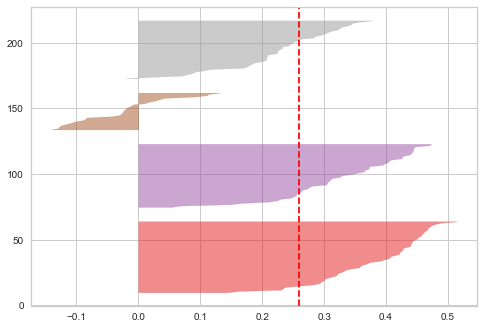

silhouette score for 5 cluster is: 0.2057


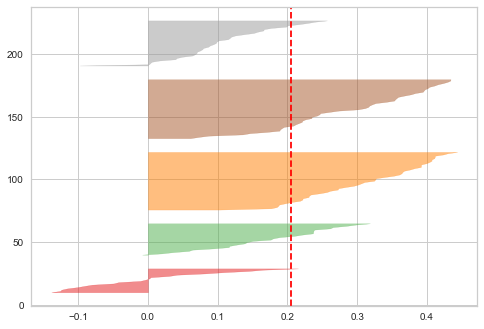

silhouette score for 6 cluster is: 0.1885


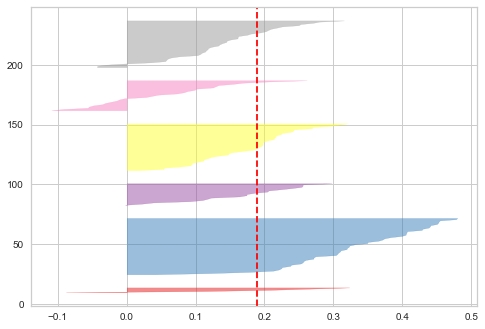

In [42]:
num = [2,3,4,5,6]

for i in num:
    model = KMeans(i)
    model.fit(data_sc)
    score = silhouette_score(data_sc, model.labels_)
    print(f'silhouette score for {i} cluster is: {round(score,4)}')
    v = SilhouetteVisualizer(model)
    v.fit(data_sc)
    plt.show()

Here optimal value for K is 3

In [45]:
km=KMeans(n_clusters=3)
km.fit(data_sc)
km_lables=km.predict(data_sc)

In [46]:
km_lables

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [47]:
centroids = km.cluster_centers_

In [48]:
centroids

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

In [51]:
df_sc_km=data_sc.copy()
df_sc_km['labels']=km_lables
df_sc_km.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2


# Agglomerative


In [52]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

In [56]:
c=[2,3,4]
link=['single','complete','average','ward']

for i in c:
    for l in link:
        cluster=AgglomerativeClustering(n_clusters=i,linkage=l)
        cluster.fit(data_sc)
        label=cluster.labels_
        score = silhouette_score(data_sc,label,random_state=10)
        print('The score of',i,'clusters and',l,'linkage is',score)
        
    print('\n')

The score of 2 clusters and single linkage is 0.2224506072765093
The score of 2 clusters and complete linkage is 0.16186821075824515
The score of 2 clusters and average linkage is 0.2591060736265412
The score of 2 clusters and ward linkage is 0.2670131771272231


The score of 3 clusters and single linkage is 0.18273797160972796
The score of 3 clusters and complete linkage is 0.20378689690677748
The score of 3 clusters and average linkage is 0.15752526243774137
The score of 3 clusters and ward linkage is 0.2774439826952266


The score of 4 clusters and single linkage is 0.18107824369509828
The score of 4 clusters and complete linkage is 0.19382526203175698
The score of 4 clusters and average linkage is 0.1490031823895135
The score of 4 clusters and ward linkage is 0.22583665933475802




In [60]:
link = ['single', 'complete','average', 'ward', 'centroid']
for l in link:
        z = linkage(data_sc, method = l)
        coph, coph_dist = cophenet(z, pdist(data_sc))
        print('Cophenetic value for ', l , 'is: ', round(coph,4))
    

Cophenetic value for  single is:  0.5436
Cophenetic value for  complete is:  0.5917
Cophenetic value for  average is:  0.7591
Cophenetic value for  ward is:  0.6623
Cophenetic value for  centroid is:  0.7565


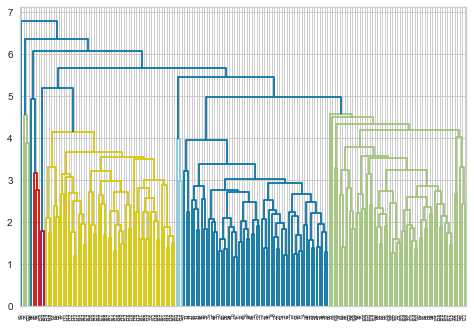

In [61]:
Z = linkage(data_sc, method ='average')
dendrogram(Z)
plt.show()

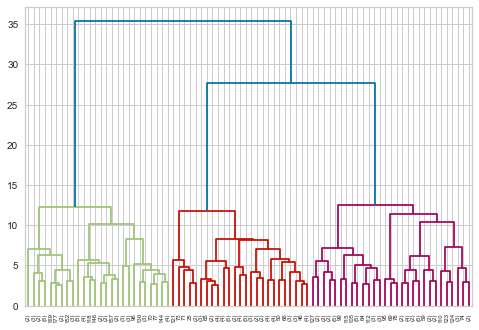

In [63]:
Z = linkage(data_sc, method ='ward')
dendrogram(Z, truncate_mode= 'lastp', p=80)
plt.show()

In [64]:
agg = AgglomerativeClustering(n_clusters= 3, linkage='ward')
agg_labels = agg.fit_predict(data_sc)

In [65]:
agg_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [67]:
df_sc_agg = data_sc.copy()
df_sc_agg['labels'] = agg_labels
df_sc_agg.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2


Text(0, 0.5, 'Proline')

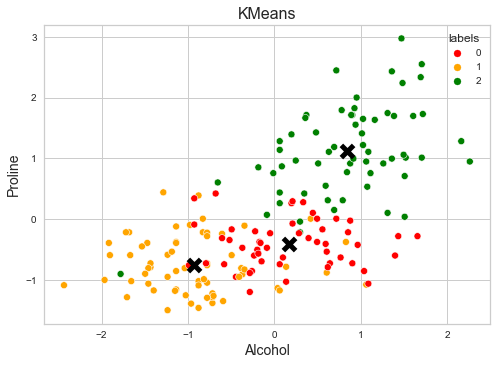

In [70]:
sns.scatterplot(df_sc_km['alcohol'],df_sc_km['proline'], hue = df_sc_km['labels'], palette = ['red','orange','green'])
plt.scatter(centroids[:,0], centroids[:,12],  marker = "x", s=150, 
    linewidths = 5, zorder = 10, color ='black')
plt.title('KMeans', size =16)
plt.xlabel('Alcohol', size=14)
plt.ylabel('Proline', size=14)

Text(0, 0.5, 'Proline')

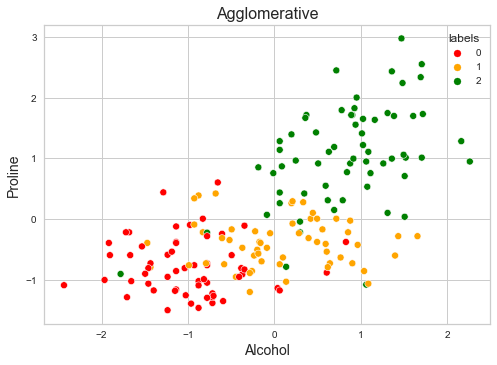

In [72]:
sns.scatterplot(df_sc_agg['alcohol'],df_sc_agg['proline'], hue = df_sc_agg['labels'], palette = ['red','orange','green'])
plt.title('Agglomerative', size =16)
plt.xlabel('Alcohol', size=14)
plt.ylabel('Proline', size=14)

# Kmeans and Agg with PCA using sklearn:


In [73]:
from sklearn.decomposition import PCA

In [74]:
pca = PCA()
pca.fit(data_sc)

PCA()

In [75]:
exp_var = pca.explained_variance_

In [76]:
pca.explained_variance_*100

array([473.24369776, 251.10809296, 145.42418678,  92.41658668,
        85.80486765,  64.52822125,  55.41414662,  35.04662749,
        29.05120327,  25.23200104,  22.70642817,  16.9723739 ,
        10.39619918])

In [77]:
pca.explained_variance_ratio_*100

array([36.1988481 , 19.20749026, 11.12363054,  7.06903018,  6.56329368,
        4.93582332,  4.23867932,  2.68074895,  2.2221534 ,  1.93001909,
        1.73683569,  1.29823258,  0.79521489])

In [79]:
cum_var = np.cumsum(pca.explained_variance_ratio_)*100
cum_var

array([ 36.1988481 ,  55.40633836,  66.52996889,  73.59899908,
        80.16229276,  85.09811607,  89.3367954 ,  92.01754435,
        94.23969775,  96.16971684,  97.90655253,  99.20478511,
       100.        ])

In [80]:
pca.n_components_

13

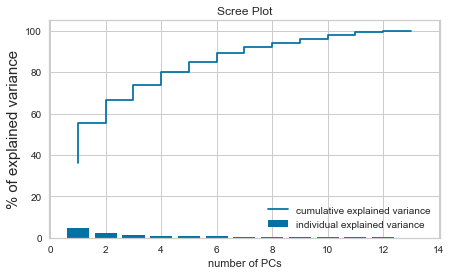

In [81]:
plt.figure(figsize=(7,4))
num = range(1,14)
plt.bar(num,exp_var, label='individual explained variance')
plt.step(num, cum_var, label='cumulative explained variance')
plt.title('Scree Plot');
plt.xlabel('number of PCs');
plt.ylabel('% of explained variance', size =15);
plt.legend(loc = 'best')
plt.show()

In [83]:
pca = PCA(n_components=10)
x_pca = pd.DataFrame(pca.fit_transform(data_sc), columns=['pc1','pc2', 'pc3', 'pc4','pc5', 'pc6', 'pc7','pc8','pc9','pc10'])
x_pca.head(3)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361


In [84]:
num = range(1,11)
err = []

for i in num:
    model = KMeans(i)
    model.fit(x_pca)
    err.append(model.inertia_)

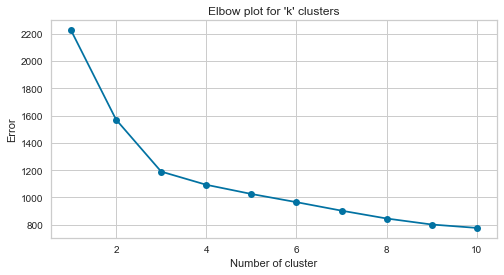

In [85]:
plt.figure(figsize=(8,4))
plt.plot(num, err, marker='o');
plt.xlabel('Number of cluster');
plt.ylabel('Error');
plt.title("Elbow plot for 'k' clusters");

In [86]:
num = [2,3,4,5,6]

for i in num:
    model = KMeans(i)
    model.fit(x_pca)
    score = silhouette_score(x_pca, model.labels_)
    print(f'silhouette score for {i} cluster is: {round(score,4)}')

silhouette score for 2 cluster is: 0.2793
silhouette score for 3 cluster is: 0.2987
silhouette score for 4 cluster is: 0.2583
silhouette score for 5 cluster is: 0.2434
silhouette score for 6 cluster is: 0.2069


In [87]:
# optimal is k=3

In [88]:
km_pca = KMeans(n_clusters= 3)
km_pca.fit(x_pca)
km_pca_labels = km_pca.predict(x_pca)

In [89]:
centroids = km_pca.cluster_centers_

In [90]:
df_pca_km = x_pca.copy()
df_pca_km['labels'] = km_pca_labels
df_pca_km.head(2)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,labels
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.22388,0.596427,0.065139,0.641443,1.020956,2
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.92712,0.053776,1.024416,-0.308847,0.159701,2


# PCA Agglomerative:


In [91]:
c = [2,3,4]
link=['single','complete','average','ward']
score= []
for i in c:
    for l in link:
        cluster=AgglomerativeClustering(n_clusters=i,linkage=l)
        cluster.fit(x_pca)
        label = cluster.labels_
        score = silhouette_score(x_pca,label,random_state=10)
        print('The score of', i ,'clusters and',l,'linkage is ',score)
    
    print('\n')

The score of 2 clusters and single linkage is  0.23084906256900492
The score of 2 clusters and complete linkage is  0.25329755518203856
The score of 2 clusters and average linkage is  0.2639317816736073
The score of 2 clusters and ward linkage is  0.2720325942157366


The score of 3 clusters and single linkage is  0.18700851324567513
The score of 3 clusters and complete linkage is  0.22271041837351757
The score of 3 clusters and average linkage is  0.14925264017611195
The score of 3 clusters and ward linkage is  0.28395207781384085


The score of 4 clusters and single linkage is  0.16239219059344545
The score of 4 clusters and complete linkage is  0.13355633035343023
The score of 4 clusters and average linkage is  0.14569959827589202
The score of 4 clusters and ward linkage is  0.225055525109939




In [92]:
link = ['single', 'complete','average', 'ward', 'centroid']

for l in link:
    z = linkage(x_pca, method = l)
    coph, coph_dist = cophenet(z, pdist(x_pca))
    print('Cophenetic value for ', l , 'is: ', round(coph,4))

Cophenetic value for  single is:  0.5346
Cophenetic value for  complete is:  0.6598
Cophenetic value for  average is:  0.7615
Cophenetic value for  ward is:  0.6637
Cophenetic value for  centroid is:  0.7604


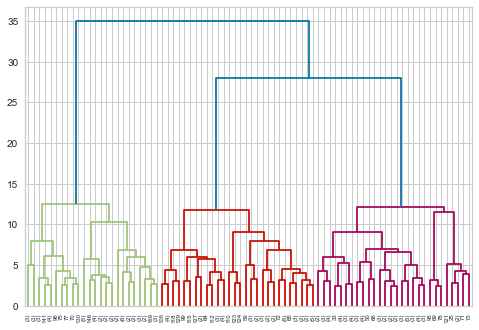

In [93]:
Z = linkage(x_pca, method ='ward')
dendrogram(Z, truncate_mode= 'lastp', p=80)
plt.show()

In [94]:
# optimal k=3

In [95]:
agg_pca = AgglomerativeClustering(n_clusters= 3, linkage='ward')
agg_pca_labels = agg_pca.fit_predict(x_pca)

In [96]:
df_pca_agg = x_pca.copy()
df_pca_agg['labels'] = agg_pca_labels
df_pca_agg.head(2)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,labels
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.22388,0.596427,0.065139,0.641443,1.020956,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.92712,0.053776,1.024416,-0.308847,0.159701,1


Text(0, 0.5, 'Proline')

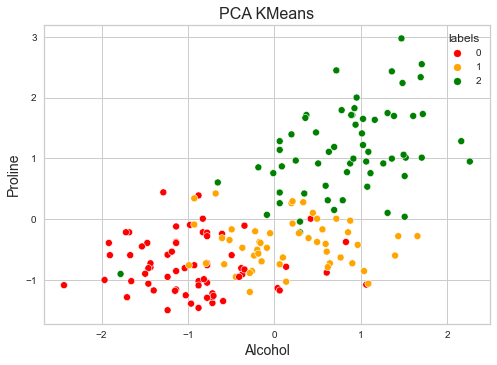

In [100]:
sns.scatterplot(data_sc['alcohol'],data_sc['proline'], hue = df_pca_km['labels'], palette = ['red','orange','green'])
plt.title('PCA KMeans', size =16)
plt.xlabel('Alcohol', size=14)
plt.ylabel('Proline', size=14)

Text(0, 0.5, 'Proline')

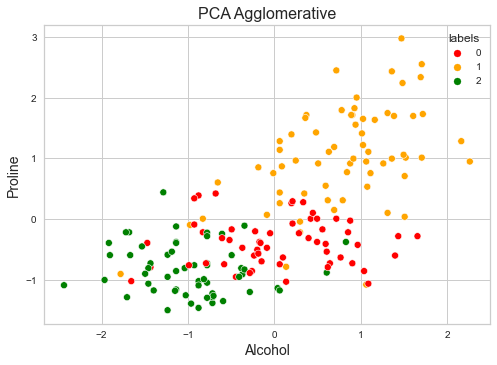

In [101]:
sns.scatterplot(data_sc['alcohol'],data_sc['proline'], hue = df_pca_agg['labels'], palette = ['red','orange','green'])
plt.title('PCA Agglomerative', size =16)
plt.xlabel('Alcohol', size=14)
plt.ylabel('Proline', size=14)

Text(0, 0.5, 'Proline')

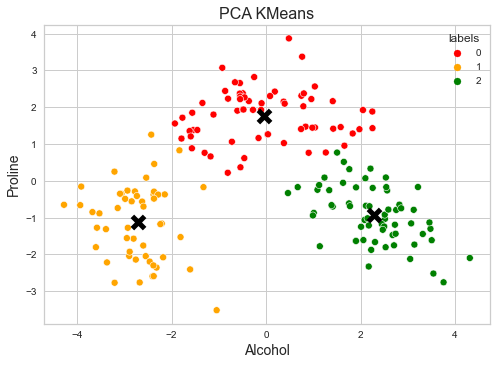

In [102]:
sns.scatterplot(df_pca_km['pc1'],df_pca_km['pc2'], hue = df_pca_km['labels'], palette = ['red','orange','green'])
plt.scatter(centroids[:,0], centroids[:,1], marker = "x", s=150, 
    linewidths = 5, zorder = 10, color ='black')
plt.title('PCA KMeans', size =16)
plt.xlabel('Alcohol', size=14)
plt.ylabel('Proline', size=14)


Text(0, 0.5, 'Proline')

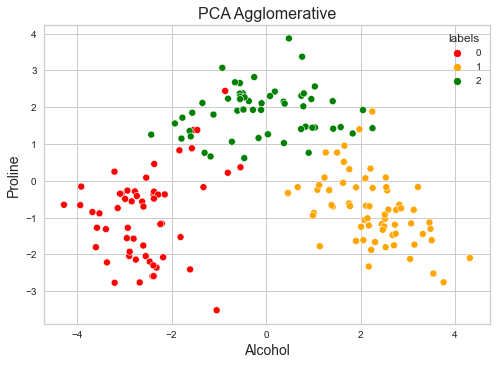

In [103]:
sns.scatterplot(df_pca_agg['pc1'],df_pca_agg['pc2'], hue = df_pca_agg['labels'], palette = ['red','orange','green'])
plt.title('PCA Agglomerative', size =16)
plt.xlabel('Alcohol', size=14)
plt.ylabel('Proline', size=14)

In [104]:
# in pca, kmeans is doing well. no overlapping and separation is good